In [2]:
from sklearn import tree
import pandas as pd
import os

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
model = pd.read_csv(os.path.join("USA_FR_CHM_GDP.csv"))
model.head()

,Country,YEAR,Fertility Rate,Child Mortality 0-5 YO,GDP per Capita
0,United States,1799,7.03,329.0,1980
1,United States,1800,7.01,329.0,2020
2,United States,1801,6.99,329.0,2050
3,United States,1802,6.96,329.0,2020
4,United States,1803,6.94,329.0,2010


In [5]:
#TABLE 2, GDP per Capita vs Fertility Rate
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = model["Fertility Rate"].values.reshape(-1, 1)
y = model["GDP per Capita"].values.reshape(-1, 1)

print(model['Fertility Rate'].shape)
print("Shape: ", X.shape, y.shape)

(241,)
Shape:  (241, 1) (241, 1)


Text(0, 0.5, 'GDP per Capita')

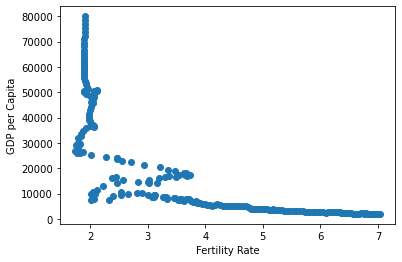

In [6]:
 # Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Fertility Rate")
plt.ylabel("GDP per Capita")
### END SOLUTION

In [7]:
 # Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [8]:
 # Create the model


from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [9]:
# Fit the model to the training data. 


model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5342691353198555
Testing Score: 0.5656010244653968


In [9]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score


# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 212699758.70616642
R-squared (R2 ): 0.5656010244653968


Text(0.5, 1.0, 'Residual Plot')

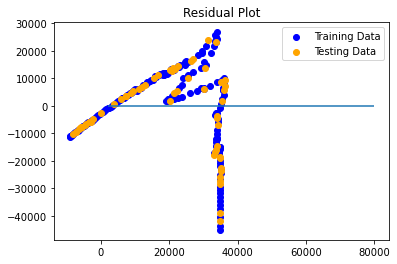

In [11]:
 # Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [12]:
 # Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)

0.5656010244653968